In [1]:
import numpy as np
import matplotlib.pyplot as plt

Use CTMC model to simulate predator-prey dynamics:

In [2]:
def time(b,d,q,x):
    # holding time at each state
    return np.random.exponential(scale=1.0/(b*x[0]+d*x[1]+q*x[0]*x[1]))

def simulation(X, b,d,q,T0,T):
    '''
    X: initial population
    b: birth rate constant
    d: death rate constant
    q: predation rate constant
    [T0,T]: specified time interval
    '''
    sample=[X]
    temp=sample[-1]
    t0 = T0
    t=[0]
    while t0<=T:
        temp1=b*temp[0]
        temp2=d*temp[1]
        temp3=q*temp[0]*temp[1]
        total=temp1+temp2+temp3
        prob=[temp1/total,temp2/total,temp3/total]
        event=[[1,0],[0,-1],[-1,1]] 
        # [1,0] for birth, [0,-1] for death, [-1,1] for predation
        index=np.random.choice([0,1,2],p=prob) # randomly choose a state
        temp=np.add(temp,event[index])
        t0+=time(b,d,q,temp) # holding time
        t.append(t0)
        sample.append(temp)
    return np.array(sample),t

### Situation (1): Wolf population dies out while rabbits grow. 

Text(0.5, 0.98, 'Wolf population dies out while rabbits grow for {b,d,q}={1,5,0.01}')

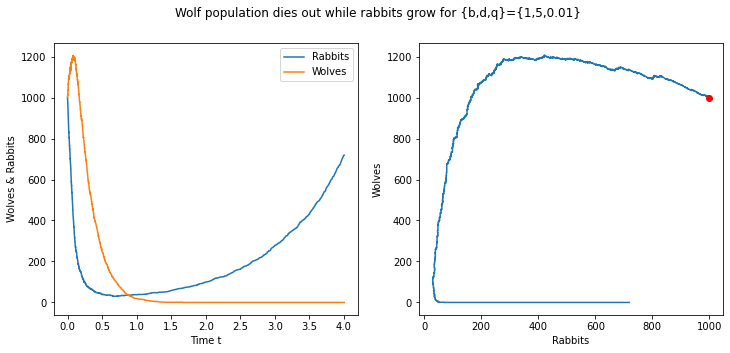

In [3]:
X0 = [1000, 1000]
b=1
d=5
q=0.01
T0=0
T=4
sol=simulation(X0, b,d,q,T0,T)
x1 = sol[0].T[0]
x2 = sol[0].T[1]
t=sol[1]
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(t,x1, t, x2)
ax1.set_xlabel('Time t')
ax1.set_ylabel('Wolves & Rabbits')
ax1.legend(('Rabbits', 'Wolves')) 
# phase portrait
ax2 = fig.add_subplot(1,2,2)
ax2.plot(x1,x2)
ax2.plot(x1[0], x2[0], 'ro') # starting point
ax2.set_xlabel('Rabbits')
ax2.set_ylabel('Wolves') 
fig.suptitle("Wolf population dies out while rabbits grow for {b,d,q}={1,5,0.01}")

### Situation (2): Rabbit population dies out.

Text(0.5, 0.98, 'Rabbit population dies out for {b,d,q}={3,2,0.01}')

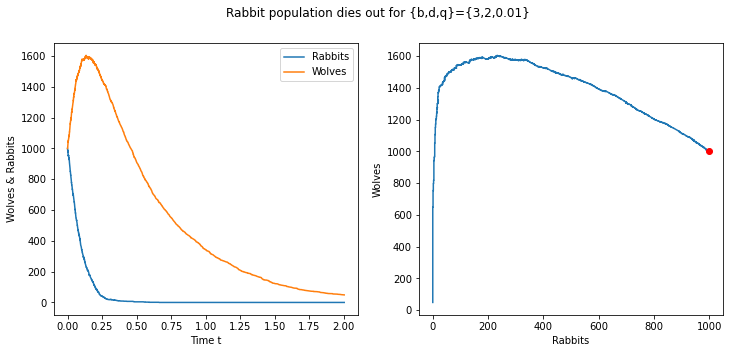

In [4]:
X0 = [1000, 1000]
b=3
d=2
q=0.01
T0=0
T=2
sol=simulation(X0, b,d,q,T0,T)
x1 = sol[0].T[0]
x2 = sol[0].T[1]
t=sol[1]
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(t,x1, t, x2)
ax1.set_xlabel('Time t')
ax1.set_ylabel('Wolves & Rabbits')
ax1.legend(('Rabbits', 'Wolves')) 
# phase portrait
ax2 = fig.add_subplot(1,2,2)
ax2.plot(x1,x2)
ax2.plot(x1[0], x2[0], 'ro') # starting point
ax2.set_xlabel('Rabbits')
ax2.set_ylabel('Wolves') 
fig.suptitle("Rabbit population dies out for {b,d,q}={3,2,0.01}")

### Situation (3): Both populations move up and down together.

Text(0.5, 0.98, 'Both population moves together for {b,d,q}={5,5,0.01}')

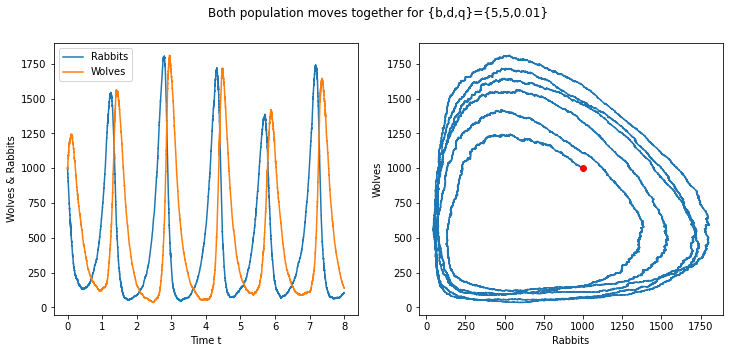

In [5]:
X0 = [1000, 1000]
b=5
d=5
q=0.01
T0=0
T=8
sol=simulation(X0, b,d,q,T0,T)
x1 = sol[0].T[0]
x2 = sol[0].T[1]
t=sol[1]
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(t,x1, t, x2)
ax1.set_xlabel('Time t')
ax1.set_ylabel('Wolves & Rabbits')
ax1.legend(('Rabbits', 'Wolves')) 
# phase portrait
ax2 = fig.add_subplot(1,2,2)
ax2.plot(x1,x2)
ax2.plot(x1[0], x2[0], 'ro') # starting point
ax2.set_xlabel('Rabbits')
ax2.set_ylabel('Wolves') 
fig.suptitle("Both population moves together for {b,d,q}={5,5,0.01}")